# Entanglement in Action

# Superdense Coding

In [2]:
%pip install qiskit[visualization]

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install qiskit_aer

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Required imports
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer.primitives import Sampler
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

Here is a simple implementation of superdense coding where we specify the circuit itself depending on the bits to be transmitted. First let's specify the bits to be transmitted. (Try changing the bits to see that it works correctly.)

In [5]:
c = "1"
d = "0"

Now we'll build the circuit accordingly. Here we'll just allow Qiskit to use the default names for the qubits: 
q0 for the top qubit and q1 for the bottom one.

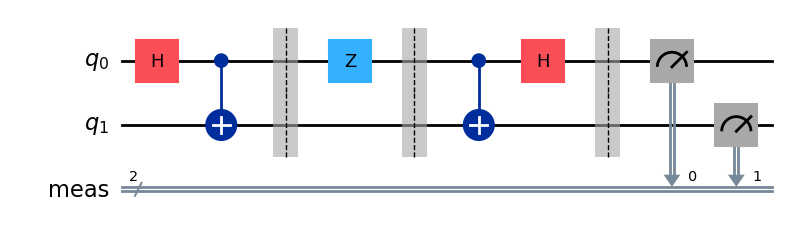

In [6]:
protocol = QuantumCircuit(2)

# Prepare ebit used for superdense coding
# Replace the ? 
protocol.h(0)           # Apply Hadamard gate on the first qubit (q0)
protocol.cx(0, 1)       # Apply CNOT gate with q0 as control and q1 as target
protocol.barrier()

# Alice's operations
if d == "1":
    protocol.x(0)       # Apply X gate if d is 1
if c == "1":
    protocol.z(0)       # Apply Z gate if c is 1
protocol.barrier()

# Bob's actions
protocol.cx(0, 1)       # Apply CNOT with q0 as control and q1 as target
protocol.h(0)           # Apply Hadamard on q0
protocol.measure_all()

display(protocol.draw('mpl'))

Remark the `measure_all` function, which measures all of the qubits and puts the results into a single classical register (therefore having two bits in this case).

Running the Aer simulator produces the expected output.

Measured 01 with frequency 1.0


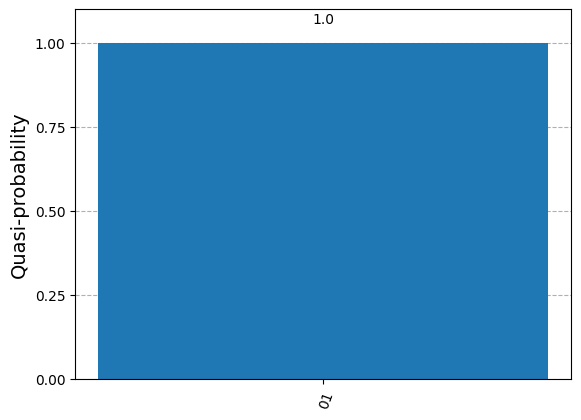

In [7]:
# Replace ? 
result = Sampler().run(protocol).result()
statistics = result.quasi_dists[0].binary_probabilities()

for outcome, frequency in statistics.items():
    print(f"Measured {outcome} with frequency {frequency}")

display(plot_histogram(statistics))

Just for fun, we can use an additional qubit as a random bit generator to randomly choose 
c and d, then run the superdense coding protocol to see that these bits are transmitted correctly.

In [ ]:
rbg = QuantumRegister(1, "randomizer")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")

Alice_c = ClassicalRegister(1, "Alice c")
Alice_d = ClassicalRegister(1, "Alice d")

test = QuantumCircuit(rbg, ebit0, ebit1, Alice_d, Alice_c)

# Initialize the ebit
# Replace ?
test.h(ebit0)           # Prepare entanglement
test.cx(ebit0, ebit1)   # Create entanglement between Alice's and Bob's qubits
test.barrier()

# Use the 'randomizer' qubit twice to generate Alice's bits c and d.
# Use the Hadamard Gate to create the random bit, with a measurement.
# Replace ?
test.h(rbg)
test.measure(rbg, Alice_c)# Measure for Alice's c bit
test.h(rbg)# Reapply Hadamard to create another random bit
test.measure(rbg, Alice_d)# Measure for Alice's d bit
test.barrier()

# Now the protocol runs, starting with Alice's actions, which depend
# on her bits.
# Replace ?
with test.if_test((Alice_d, 1), label="Z"):
    test.z(ebit0)# Apply Z gate if Alice's d is 1
with test.if_test((Alice_c, 1), label="X"):
    test.x(ebit0)# Apply X gate if Alice's c is 1
test.barrier()

# Bob's actions
# Replace 
test.cx(?????, ?????)
test.h(?????)
test.barrier()

Bob_c = ClassicalRegister(1, "Bob c")
Bob_d = ClassicalRegister(1, "Bob d")
test.add_register(Bob_d)
test.add_register(Bob_c)
test.measure(?????, ?????)
test.measure(?????, ?????)

display(test.draw('mpl'))

Running the Aer simulator shows the results: Alice and Bob's classical bits always agree.

In [ ]:
# Replace ? 
result = AerSimulator().run(test).result()
statistics = result.get_counts()
display(plot_histogram(?))

# End of Notebook